# **🧬 What is MSA (Multiple Sequence Alignment)?**
Multiple Sequence Alignment (MSA) is the process of aligning three or more biological sequences (DNA, RNA, or protein) to identify regions of similarity that may indicate:

Functional importance (e.g., active sites in proteins),

Evolutionary relationships,

Conserved motifs or domains.


**🔍 Example of MSA (Protein)**
Imagine aligning 4 sequences:

seq1: MKTAYIAKQRQISFVKSHFSRQ

seq2: MKTAYIAK-RQISFVKSHFSRQ

seq3: MK-AFIAKQRQISFVKSHFSRQ

seq4: MKTAYIAKQRQISFVKSHF-QQ

Dashes (-) represent gaps inserted to maximize alignment.

Conserved regions (same amino acids across sequences) suggest functional or structural importance.




| Purpose                    | Use                                             |
| -------------------------- | ----------------------------------------------- |
| 🧪 **Function prediction** | Find conserved domains, active sites            |
| 🌳 **Phylogenetics**       | Build evolutionary trees from aligned sequences |
| 🧬 **Motif discovery**     | Find shared patterns in sequences               |
| 🧫 **Vaccine/Drug design** | Identify conserved targets in pathogens         |
| 🔬 **Variant analysis**    | Detect mutations across genomes                 |

# **Key Concepts**

| Term                 | Meaning                                                             |
| -------------------- | ------------------------------------------------------------------- |
| **Gap**              | A placeholder (`-`) used to align sequences of different lengths    |
| **Conserved region** | A region that remains unchanged across multiple species             |
| **Alignment score**  | A measure of how well sequences match (using substitution matrices) |
| **Indel**            | Insertion or deletion introduced in alignment                       |


# Tools for MSA

| Tool                    | Use                                           | Interface          |
| ----------------------- | --------------------------------------------- | ------------------ |
| **Clustal Omega**       | Fast and widely used                          | Web & command-line |
| **MUSCLE**              | High accuracy                                 | Web & command-line |
| **MAFFT**               | Very fast, great for large datasets           | Web & command-line |
| **T-Coffee**            | Structural-aware alignments                   | Web & command-line |
| **Biopython (AlignIO)** | Reading and manipulating alignments in Python | Python scripting   |


| Application         | Example                                                   |
| ------------------- | --------------------------------------------------------- |
| 🧬 Evolution        | Align hemoglobin genes across species to study divergence |
| 💊 Drug design      | Identify conserved protein domains in viral proteins      |
| 🧪 Protein function | Predict structure/function from conserved motifs          |
| 🧫 Diagnostics      | Compare pathogen genomes to detect mutations              |


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.1 MB/s eta 0:00:00


In [ ]:
from Bio import AlignIO
from io import StringIO

msa = """>seq1
MKTA-YIAKQRQISFVKSHFSRQ
>seq2
MKTA-YIAK-RQISFVKSHFSRQ
>seq3
MK-AFIAKQRQISFVKSHFSRQA
"""

alignment = AlignIO.read(StringIO(msa), "fasta")
print(alignment)


Alignment with 3 rows and 23 columns
MKTA-YIAKQRQISFVKSHFSRQ seq1
MKTA-YIAK-RQISFVKSHFSRQ seq2
MK-AFIAKQRQISFVKSHFSRQA seq3


# 🧬 What is Parsing MSA?
Parsing an alignment means reading the aligned sequences (in FASTA, CLUSTAL, or other formats) into Python so you can:

Extract sequences

Count positions

Analyze conserved sites

Build substitution matrices

Visualize alignments




In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# Simulated gene sequences
orchid_sequences = [
    SeqRecord(Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"), id="orchid_gene1", description="simulated"),
    SeqRecord(Seq("ATGGCCATTGTAATGGGCCGCTGAAGGGTGCCCGATAG"), id="orchid_gene2", description="simulated"),
    SeqRecord(Seq("ATGGCCATTGTGATGGGCCGCTGAAAGGGTGCCCGAAG"), id="orchid_gene3", description="simulated"),
    SeqRecord(Seq("ATGGCCATTGTAATGGGCCGTTGAAAGGGTGCCCGATAG"), id="orchid_gene4", description="simulated"),
]

# Write to FASTA file
SeqIO.write(orchid_sequences, "orchid_sample.fasta", "fasta")

4

In [ ]:
!cat orchid_sample.fasta

>orchid_gene1 simulated
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
>orchid_gene2 simulated
ATGGCCATTGTAATGGGCCGCTGAAGGGTGCCCGATAG
>orchid_gene3 simulated
ATGGCCATTGTGATGGGCCGCTGAAAGGGTGCCCGAAG
>orchid_gene4 simulated
ATGGCCATTGTAATGGGCCGTTGAAAGGGTGCCCGATAG


In [ ]:
!apt-get install -y muscle


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
muscle is already the newest version (1:3.8.1551-2build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!muscle -in orchid_sample.fasta -out orchid_aligned.fasta



MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

orchid_sample 4 seqs, lengths min 38, max 39, avg 38
00:00:00     16 MB(4%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     16 MB(4%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     17 MB(4%)  Iter   1  100.00%  Align node
00:00:00     17 MB(4%)  Iter   1  100.00%  Root alignment
00:00:00     17 MB(4%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(4%)  Iter   3  100.00%  Refine biparts


In [ ]:
alignment = AlignIO.read("orchid_aligned.fasta", "fasta")

print("Aligned Sequences:")
print(alignment)


Aligned Sequences:
Alignment with 4 rows and 39 columns
ATGGCCATTGTGATGGGCCGCTGAAAGGGTGCCCGA-AG orchid_gene3
ATGGCCATTGTAATGGGCCGTTGAAAGGGTGCCCGATAG orchid_gene4
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG orchid_gene1
ATGGCCATTGTAATGGGCCGCTG-AAGGGTGCCCGATAG orchid_gene2


In [ ]:
alignment = AlignIO.read("orchid_aligned.fasta", "fasta")

print("Number of sequences:", len(alignment))
print("Length of alignment:", alignment.get_alignment_length())

for record in alignment:
    print(record.id, ":", record.seq)

Number of sequences: 4
Length of alignment: 39
orchid_gene3 : ATGGCCATTGTGATGGGCCGCTGAAAGGGTGCCCGA-AG
orchid_gene4 : ATGGCCATTGTAATGGGCCGTTGAAAGGGTGCCCGATAG
orchid_gene1 : ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
orchid_gene2 : ATGGCCATTGTAATGGGCCGCTG-AAGGGTGCCCGATAG


# Analyze Conserved Sites

In [ ]:
from collections import Counter

conserved = 0
print("\nConserved positions (same base across all sequences):")

for i in range(alignment.get_alignment_length()):
    column = alignment[:, i]
    freq = Counter(column)
    if len(freq) == 1:
        conserved += 1
        print(f"Position {i+1}: {column} (fully conserved)")

print(f"\nTotal conserved positions: {conserved} / {alignment.get_alignment_length()}")



Conserved positions (same base across all sequences):
Position 1: AAAA (fully conserved)
Position 2: TTTT (fully conserved)
Position 3: GGGG (fully conserved)
Position 4: GGGG (fully conserved)
Position 5: CCCC (fully conserved)
Position 6: CCCC (fully conserved)
Position 7: AAAA (fully conserved)
Position 8: TTTT (fully conserved)
Position 9: TTTT (fully conserved)
Position 10: GGGG (fully conserved)
Position 11: TTTT (fully conserved)
Position 13: AAAA (fully conserved)
Position 14: TTTT (fully conserved)
Position 15: GGGG (fully conserved)
Position 16: GGGG (fully conserved)
Position 17: GGGG (fully conserved)
Position 18: CCCC (fully conserved)
Position 19: CCCC (fully conserved)
Position 20: GGGG (fully conserved)
Position 22: TTTT (fully conserved)
Position 23: GGGG (fully conserved)
Position 25: AAAA (fully conserved)
Position 26: AAAA (fully conserved)
Position 27: GGGG (fully conserved)
Position 28: GGGG (fully conserved)
Position 29: GGGG (fully conserved)
Position 30: TTTT 

# Build Substitution Matrix

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Nucleotide alphabet
alphabet = list("ATGC")
matrix = pd.DataFrame(0, index=alphabet, columns=alphabet)

# Compare all sequence pairs
for seq1, seq2 in combinations(alignment, 2):
    for a, b in zip(seq1.seq, seq2.seq):
        if a in alphabet and b in alphabet:
            matrix.loc[a, b] += 1
            if a != b:
                matrix.loc[b, a] += 1  # Symmetric update

print("Substitution Matrix:")
print(matrix)


Substitution Matrix:
    A   T   G   C
A  48   0   3   0
T   0  45   0   3
G   3   0  84   0
C   0   3   0  45


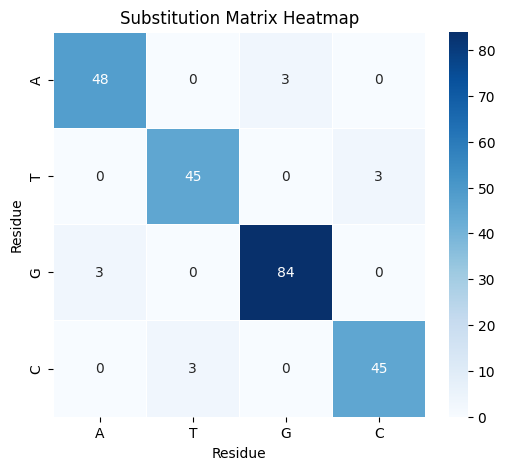

In [ ]:
#Visualize Substitution Matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Substitution Matrix Heatmap")
plt.xlabel("Residue")
plt.ylabel("Residue")
plt.show()


# Build the Log-Odds Matrix

In [ ]:
from numpy import log2

# Convert count matrix to probabilities
total = matrix.values.sum()
prob_matrix = matrix / total

# Calculate background frequencies (row sums)
background = prob_matrix.sum(axis=1)

# Outer product gives expected frequencies
expected = pd.DataFrame(np.outer(background, background), index=alphabet, columns=alphabet)

# Avoid divide-by-zero
observed = prob_matrix.replace(0, 1e-10)
expected = expected.replace(0, 1e-10)

# Calculate log-odds
log_odds = log2(observed / expected)

# Create a DataFrame
log_odds_matrix = pd.DataFrame(log_odds, index=alphabet, columns=alphabet)

print("Log-Odds Substitution Matrix (DNA):")
print(log_odds_matrix.round(2))


Log-Odds Substitution Matrix (DNA):
       A      T      G      C
A   2.11 -28.74  -2.66 -28.74
T -28.74   2.19 -29.51  -1.71
G  -2.66 -29.51   1.38 -29.51
C -28.74  -1.71 -29.51   2.19


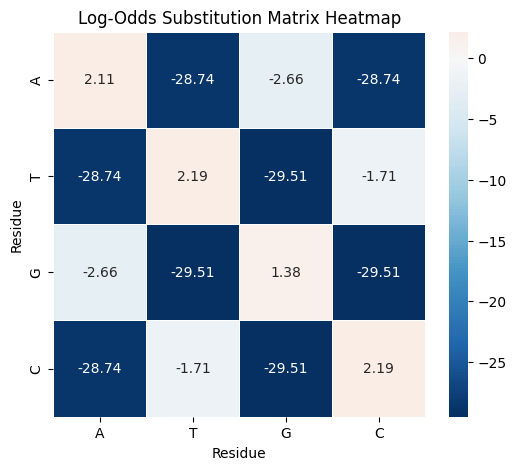

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(log_odds_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".2f", linewidths=0.5)
plt.title("Log-Odds Substitution Matrix Heatmap")
plt.xlabel("Residue")
plt.ylabel("Residue")
plt.show()


## Create a Distance Matrix (Identity Distance)

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

print("Distance Matrix:")
print(dm)


Distance Matrix:
orchid_gene3    0.000000
orchid_gene4    0.076923    0.000000
orchid_gene1    0.051282    0.025641    0.000000
orchid_gene2    0.076923    0.051282    0.025641    0.000000
    orchid_gene3    orchid_gene4    orchid_gene1    orchid_gene2


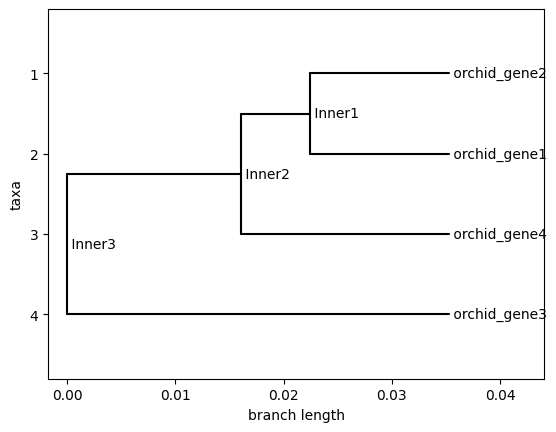

In [ ]:
# Build tree using UPGMA (or use .nj for neighbor-joining)
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw tree
Phylo.draw(tree)


# Label Phylogenetic Tree with Descriptive Gene Names

In [ ]:
# Example: Mapping sequence IDs to gene names
id_to_label = {
    "orchid1": "rbcL gene",
    "orchid2": "matK gene",
    "orchid3": "atpB gene",
    "orchid4": "ndhF gene"
}


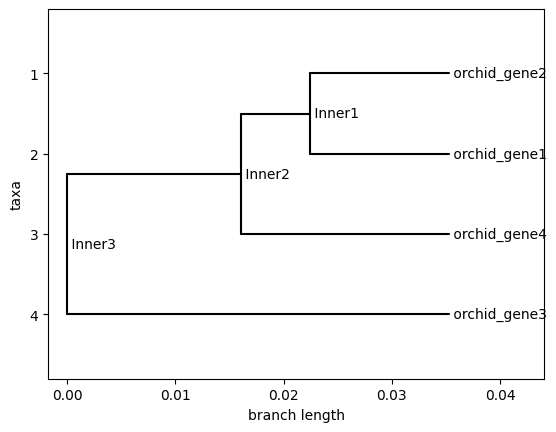

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

# Build distance matrix and tree
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)
Phylo.draw(tree)

In [ ]:
# Rename tree leaf nodes
for leaf in tree.get_terminals():
    if leaf.name in id_to_label:
        leaf.name = id_to_label[leaf.name]



In [ ]:
Phylo.draw_ascii(tree)

                                           _______________________ orchid_gene2
                               ___________|
  ____________________________|           |_______________________ orchid_gene1
 |                            |
_|                            |___________________________________ orchid_gene4
 |
 |________________________________________________________________ orchid_gene3



In [1]:
# Install MUSCLE
!apt-get install -y muscle

# Install MAFFT
!apt-get install -y mafft

# Install Clustal Omega
!apt-get install -y clustalo

# Install T-Coffee
!apt-get install -y t-coffee


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 1s (190 kB/s)
Selecting previously unselected package muscle.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../muscle_1%3a3.8.1551-2build1_amd64.deb ...
Unpacking muscle (1:3.8.1551-2build1) ...
Setting up muscle (1:3.8.1551-2build1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libauthen-sasl-perl libclone-perl libdata-dump-perl
  libencode-locale

In [6]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 75.4 MB/s eta 0:00:00


In [16]:
from google.colab import files
uploaded = files.upload()  # Upload your `input.fasta` file


Saving human_beta_globin.fasta to human_beta_globin.fasta


In [3]:
!apt-get update
!apt-get install -y clustalo


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,801 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,254 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [13]:
!clustalo --version


1.2.4


In [17]:
!clustalo -i human_beta_globin.fasta -o clustalo_beta_globin_aligned.fasta --force


In [21]:
from Bio import AlignIO

alignment = AlignIO.read("clustalo_beta_globin_aligned.fasta", "fasta")

print(f"Aligned sequences: {len(alignment)}")
print(f"Alignment length: {alignment.get_alignment_length()}")

# Display first 3 sequences
for record in alignment:
    print(record.id)
    print(record.seq[:80], "...")
    print("-" * 40)


Aligned sequences: 20
Alignment length: 73311
U01317.1
GAATTCTAATCTCCCTCTCAACCCTACAGTCACCCATTTGGTATATTAAAGATGTGTTGTCTACTGTCTAGTATCCCTCA ...
----------------------------------------
L26478.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26477.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26476.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26475.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26474.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26473.1
-------------------------------------------------------------------------------- ...
----------------------------------------
L26472.1


In [23]:
from Bio import SeqIO

for record in SeqIO.parse("human_beta_globin.fasta", "fasta"):
    print(f"{record.id} | length: {len(record.seq)} | starts with: {record.seq[:30]}")


U01317.1 | length: 73308 | starts with: GAATTCTAATCTCCCTCTCAACCCTACAGT
L26478.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26477.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26476.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26475.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26474.1 | length: 2999 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26473.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26472.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26471.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26470.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26469.1 | length: 3002 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26468.1 | length: 3002 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26467.1 | length: 3002 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26466.1 | length: 3000 | starts with: ACCTCCTATTTGACACCACTGATTACCCCA
L26465.1 | length: 

In [24]:
from Bio import SeqIO

filtered = []
for record in SeqIO.parse("human_beta_globin.fasta", "fasta"):
    if len(record.seq) < 5000:
        filtered.append(record)

# Save filtered sequences
SeqIO.write(filtered, "filtered_beta_globin.fasta", "fasta")
print(f"Kept {len(filtered)} sequences.")


Kept 19 sequences.


In [26]:
!clustalo -i filtered_beta_globin.fasta -o filtered_aligned.fasta --force


In [27]:
from Bio import AlignIO

alignment = AlignIO.read("filtered_aligned.fasta", "fasta")

print(f"Aligned sequences: {len(alignment)}")
print(f"Alignment length: {alignment.get_alignment_length()}")

# Display a few sequences
for record in alignment[:3]:
    print(record.id)
    print(record.seq[:80], "...")
    print("-" * 40)


Aligned sequences: 19
Alignment length: 3003
L26478.1
ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTT ...
----------------------------------------
L26477.1
ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTT ...
----------------------------------------
L26476.1
ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTT ...
----------------------------------------


| Goal                               | Action                                                     |
| ---------------------------------- | ---------------------------------------------------------- |
| 🌳 **Build a phylogenetic tree**   | Generate a tree from this alignment and visualize it       |
| 🔍 **Find conserved regions**      | Highlight positions that are identical across sequences    |
| 🎨 **Visualize with logo**         | Use `logomaker` or `seaborn` to plot sequence conservation |
| 📊 **Substitution matrix**         | Build a custom substitution matrix from this MSA           |
| 📁 **Export as Clustal or Phylip** | Convert this FASTA alignment to another format if needed   |


# Build a Phylogenetic Tree

<Figure size 1000x600 with 0 Axes>

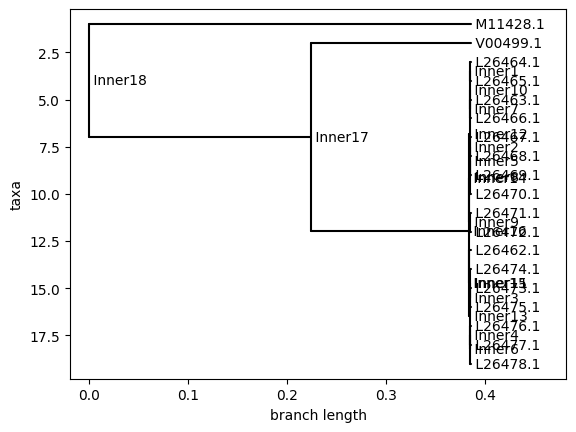

In [28]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

# Load the alignment
alignment = AlignIO.read("filtered_aligned.fasta", "fasta")

# Compute distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Build tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw tree
fig = plt.figure(figsize=(10, 6))
Phylo.draw(tree, do_show=False)
plt.show()


# Find Conserved Regions

In [29]:
from collections import Counter

alignment_length = alignment.get_alignment_length()
conserved_positions = []

for i in range(alignment_length):
    column = alignment[:, i]
    most_common = Counter(column).most_common(1)[0]
    if most_common[1] == len(alignment):  # fully conserved
        conserved_positions.append((i, most_common[0]))

print(f"Conserved positions (100%): {len(conserved_positions)}")
print("First 10 conserved sites:")
for pos, base in conserved_positions[:10]:
    print(f"Position {pos}: {base}")


Conserved positions (100%): 212
First 10 conserved sites:
Position 2208: G
Position 2209: A
Position 2210: A
Position 2211: T
Position 2212: T
Position 2213: C
Position 2214: A
Position 2215: C
Position 2216: C
Position 2217: C


# Visualize with Sequence Logo

In [30]:
!pip install logomaker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 106.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character '-' is not in color_dict. Using black.
  warnings.warn(str(Error))


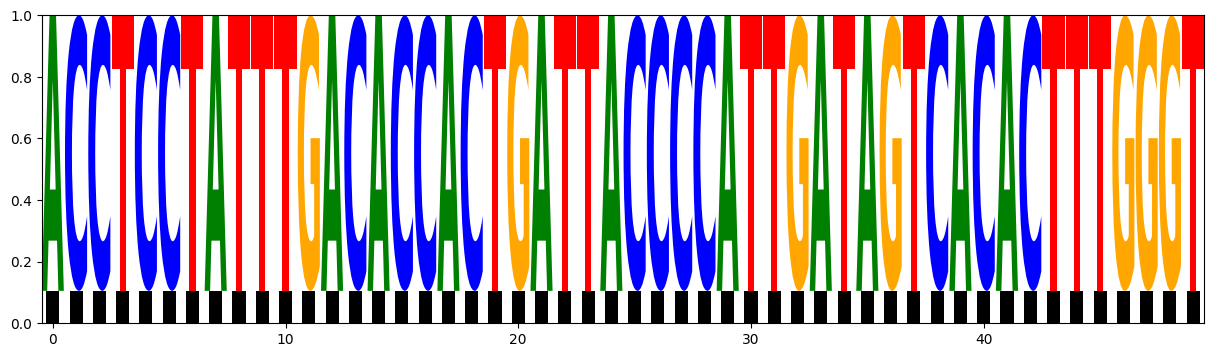

In [31]:
import logomaker
import pandas as pd
from Bio.Seq import Seq

# Extract a region (e.g. first 50 columns for clarity)
sub_alignment = alignment[:, :50]

# Convert to a dataframe of counts
df = pd.DataFrame([list(record.seq) for record in sub_alignment])
counts_df = df.apply(pd.Series.value_counts).fillna(0)

# Normalize to get probabilities
prob_df = counts_df / counts_df.sum()

# Plot the logo
logomaker.Logo(prob_df.T, figsize=(15, 4), color_scheme='classic')


# Build Substitution Matrix


** Generate Pairwise Substitution Counts **

In [33]:
import pandas as pd
from collections import Counter
import numpy as np

# Extract the alignment length and sequences
alignment_length = alignment.get_alignment_length()
sequences = [str(record.seq) for record in alignment]

# Get unique characters (excluding gaps)
all_bases = set("".join(sequences)) - {"-"}
alphabet = sorted(all_bases)

# Initialize empty substitution matrix
subs_matrix = pd.DataFrame(0, index=alphabet, columns=alphabet)

# Loop over each column in the alignment
for i in range(alignment_length):
    column = [seq[i] for seq in sequences if seq[i] != "-"]  # exclude gaps
    counts = Counter(column)
    for a in counts:
        for b in counts:
            subs_matrix.loc[a, b] += counts[a] * counts[b]

# Normalize if needed
# subs_matrix = subs_matrix / subs_matrix.values.sum()

# Show substitution matrix
subs_matrix


,A,C,G,T
A,253790,111,34,248
C,111,188782,203,565
G,34,203,189281,134
T,248,565,134,312263


from matplotlib import pyplot as plt
subs_matrix['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['C'].plot(kind='hist', bins=20, title='C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['G'].plot(kind='hist', bins=20, title='G')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['T'].plot(kind='hist', bins=20, title='T')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix.plot(kind='scatter', x='A', y='C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix.plot(kind='scatter', x='C', y='G', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix.plot(kind='scatter', x='G', y='T', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['A']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = subs_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('A')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['C']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = subs_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('C')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['G']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = subs_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('G')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['T']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'T'}, axis=1)
              .sort_values('T', ascending=True))
  xs = counted['T']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = subs_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
subs_matrix['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['C'].plot(kind='line', figsize=(8, 4), title='C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['G'].plot(kind='line', figsize=(8, 4), title='G')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
subs_matrix['T'].plot(kind='line', figsize=(8, 4), title='T')
plt.gca().spines[['top', 'right']].set_visible(False)

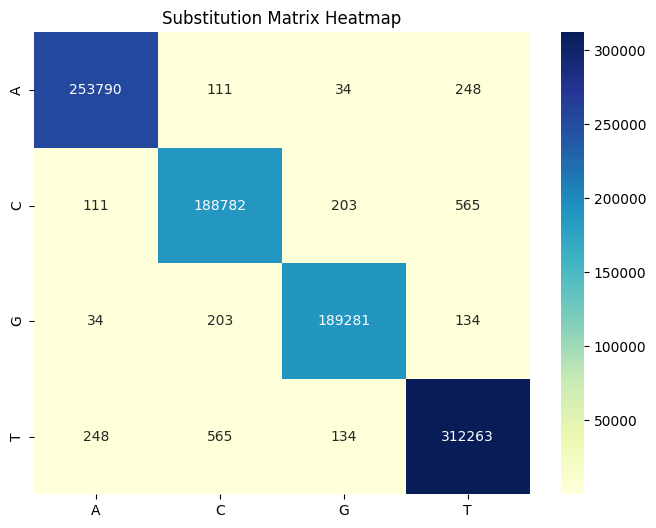

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(subs_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Substitution Matrix Heatmap")
plt.show()


In [36]:
import numpy as np
import pandas as pd

# Step 1: Normalize substitution matrix to observed probabilities
total_pairs = subs_matrix.values.sum()
observed_probs = subs_matrix / total_pairs

# Step 2: Compute single-letter frequencies
letter_freq = subs_matrix.sum(axis=1) / total_pairs

# Step 3: Compute expected probabilities matrix
expected_probs = pd.DataFrame(0, index=alphabet, columns=alphabet)

for a in alphabet:
    for b in alphabet:
        if a == b:
            expected_probs.loc[a, b] = letter_freq[a] * letter_freq[b]
        else:
            expected_probs.loc[a, b] = 2 * letter_freq[a] * letter_freq[b]

# Step 4: Compute log-odds matrix
log_odds_matrix = np.log2((observed_probs + 1e-10) / (expected_probs + 1e-10))  # Add small value to avoid log(0)

# Round for better readability
log_odds_matrix = log_odds_matrix.round(2)

# Show the log-odds matrix
log_odds_matrix


/tmp/ipython-input-36-2603720381.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07208796123811086' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_probs.loc[a, b] = letter_freq[a] * letter_freq[b]
/tmp/ipython-input-36-2603720381.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.10757820008719185' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_probs.loc[a, b] = 2 * letter_freq[a] * letter_freq[b]
/tmp/ipython-input-36-2603720381.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1075730951694661' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_probs.loc[a, b] = 2 * letter_freq

,A,C,G,T
A,1.89,-9.84,-11.55,-9.41
C,-9.84,2.31,-8.55,-7.80
G,-11.55,-8.55,2.32,-9.87
T,-9.41,-7.80,-9.87,1.59


from matplotlib import pyplot as plt
log_odds_matrix['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['C'].plot(kind='hist', bins=20, title='C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['G'].plot(kind='hist', bins=20, title='G')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['T'].plot(kind='hist', bins=20, title='T')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix.plot(kind='scatter', x='A', y='C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix.plot(kind='scatter', x='C', y='G', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix.plot(kind='scatter', x='G', y='T', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['A']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = log_odds_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('A')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['C']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = log_odds_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('C')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['T']
  ys = series['G']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = log_odds_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('G')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['T']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'T'}, axis=1)
              .sort_values('T', ascending=True))
  xs = counted['T']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = log_odds_matrix.sort_values('T', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('T')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
log_odds_matrix['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['C'].plot(kind='line', figsize=(8, 4), title='C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['G'].plot(kind='line', figsize=(8, 4), title='G')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
log_odds_matrix['T'].plot(kind='line', figsize=(8, 4), title='T')
plt.gca().spines[['top', 'right']].set_visible(False)

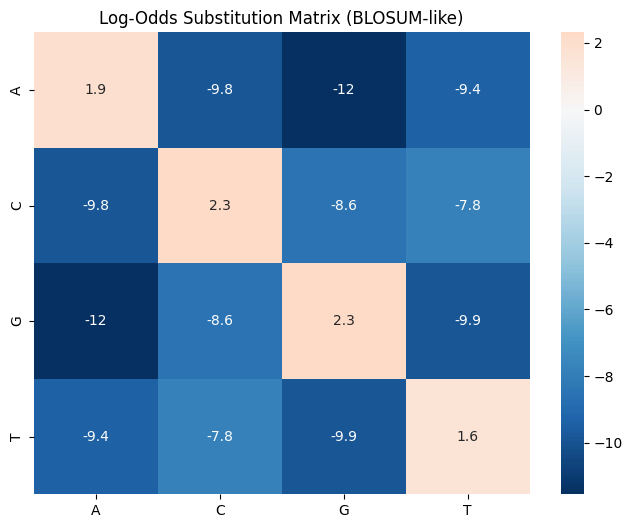

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(log_odds_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Log-Odds Substitution Matrix (BLOSUM-like)")
plt.show()


# Interpretation:
Positive values: substitutions more common than expected by chance

Negative values: substitutions less likely (conserved)

0: neutral (randomly expected)